# Human Emotion Recognition - CNN

## Objective :
This project focuses on binary classification of angry and happy emotions using the Fer-2013 dataset. The objective is to develop a robust model that can accurately identify and classify facial expressions as either angry or happy. 

### Importing  Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten,MaxPooling2D,BatchNormalization

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.callbacks import ModelCheckpoint              # Jaha se ending h vahi se start krega 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

from keras.preprocessing import image

In [3]:
from tensorflow.keras.callbacks import ModelCheckpoint  

### Loading the Data

In [4]:
train_dir=r'C:\Users\HELLO\Desktop\Datasets\Computer Vision Project\Dataset\train'
test_dir=r'C:\Users\HELLO\Desktop\Datasets\Computer Vision Project\Dataset\validation'

In [5]:
train_dir

'C:\\Users\\HELLO\\Desktop\\Datasets\\Computer Vision Project\\Dataset\\train'

In [6]:
test_dir

'C:\\Users\\HELLO\\Desktop\\Datasets\\Computer Vision Project\\Dataset\\validation'

## Image preprocessing with Image data generator 

In [7]:
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

## Set the Directory

In [8]:
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    
    target_size=(48, 48), 
    batch_size=64, 
    color_mode="grayscale", 
    class_mode='categorical',
    subset="training"
)
validation_generator = validation_datagen.flow_from_directory( 
        directory=test_dir,
        target_size=(48, 48), 
        batch_size=64, 
        color_mode="grayscale", 
        class_mode='categorical',
        subset="validation") 


Found 1522 images belonging to 2 classes.
Found 432 images belonging to 2 classes.


## Visualization 

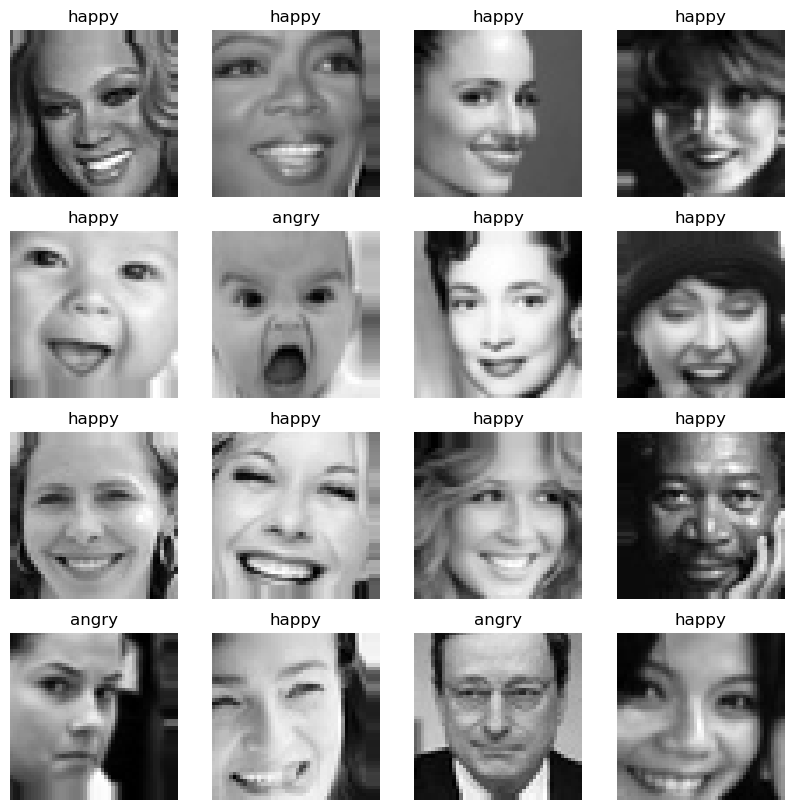

In [9]:
import matplotlib.pyplot as plt

batch =next(train_generator)

fig,axes =plt.subplots(nrows=4,ncols=4,figsize=(10,10))
for i , ax in enumerate(axes.flat):
    ax.imshow(batch[0][i],cmap='gray')
    label_idx=batch[1][i].argmax()
    label_map={v:k for k,v in train_generator.class_indices.items()}
    ax.set_title(label_map[label_idx])
    ax.axis('off')
    
plt.show()

## CNN Model

In [10]:
model= Sequential()
# write number of neurons - in the power of 2
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))

model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dense(2,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

model.summary()

C:\Users\HELLO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 44, 44, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,982,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,001,858 (7.64 MB)

 Trainable params: 2,001,666 (7.64 MB)

 Non-trainable params: 192 (768.00 B)

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_callback=ModelCheckpoint(
filepath = "model.weights.h5",
monitor='val_accuracy',
save_best_only=True,
save_weights_only=True,
mode="max",
verbose=1
)

history=model.fit(
train_generator,
batch_size=64,
epochs=10,
validation_data=validation_generator,
callbacks=[checkpoint_callback]
)

Epoch 1/10


C:\Users\HELLO\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 648ms/step - accuracy: 0.8114 - loss: 0.5788
Epoch 1: val_accuracy improved from -inf to 0.67593, saving model to model.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 732ms/step - accuracy: 0.8121 - loss: 0.5769 - val_accuracy: 0.6759 - val_loss: 0.6646
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 645ms/step - accuracy: 0.8631 - loss: 0.4162
Epoch 2: val_accuracy improved from 0.67593 to 0.68519, saving model to model.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 725ms/step - accuracy: 0.8630 - loss: 0.4162 - val_accuracy: 0.6852 - val_loss: 0.6654
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.8856 - loss: 0.3348
Epoch 3: val_accuracy did not improve from 0.68519
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 672ms/step - accuracy: 0.8850 - loss: 0.3363 - val_accuracy: 0.4792 - val_loss: 0.6972
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.8710 - loss: 0.3784
Epoch 4: val_accuracy did not improve from 0.68519
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 645ms

## Evaluation

In [12]:
validation_loss, validation_acc = model.evaluate(validation_generator)
print('Validation_Loss:',validation_loss,'\t Validation accuracy :',validation_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.3483 - loss: 1.2936
Validation_Loss: 1.3562287092208862 	 Validation accuracy : 0.3263888955116272


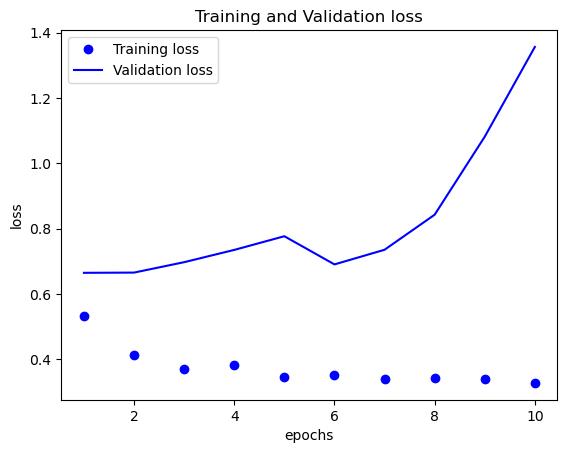

In [13]:
train_loss = history.history['loss']
val_loss = history.history['val_loss'] 
epochs = range(1, len(train_loss)+1)
plt.plot(epochs, train_loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

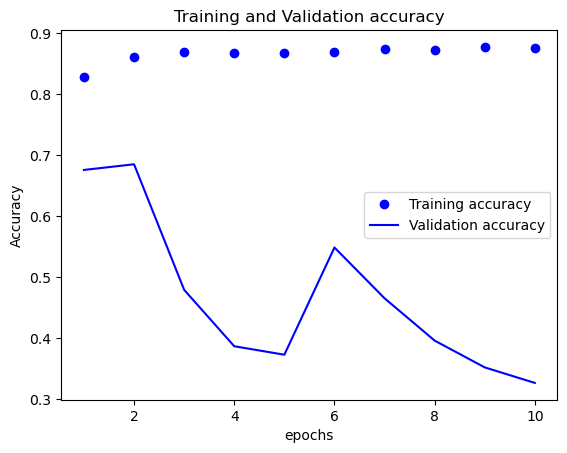

In [14]:
train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy'] 
epochs = range(1, len(train_loss)+1)
plt.plot(epochs, train_loss, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step


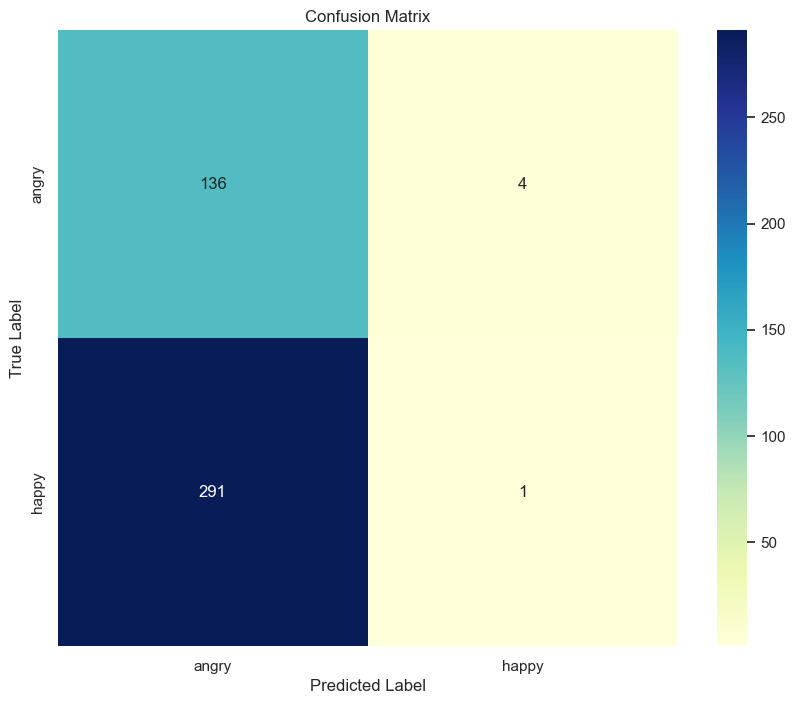

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming `validation_generator` and `model` are already defined and used for predictions
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Generate the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)

# Get class names from the training generator
class_names = list(train_generator.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, 
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [16]:
## Predicting the image as sample
img_path=r"C:\Users\HELLO\Desktop\Datasets\Computer Vision Project\Dataset\validation\angry\589.jpg"
img=image.load_img(img_path,target_size=(48,48),color_mode="grayscale")
img_array = image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.
prediction =model.predict(img_array)
label_map={v:k for k,v in train_generator.class_indices.items()}
predicted_label=label_map[np.argmax(prediction)]
print("Emotion predicted of this image is ",predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
Emotion predicted of this image is  angry
